# Tree models

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [4]:
data = pd.read_csv('card_transdata.csv', sep=',')

In [5]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
x = data.drop(columns=['fraud']) # features
y = data['fraud'] # target

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Decision Tree

In [10]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth=2)

In [12]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [13]:
y_pred = dt.predict(x_test)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.428\nsamples = 800000\nvalue = [730040, 69960]'),
 Text(0.25, 0.5, 'x[0] <= 100.004\nentropy = 0.169\nsamples = 717481\nvalue = [699446, 18035]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.053\nsamples = 681794\nvalue = [677699, 4095]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.965\nsamples = 35687\nvalue = [21747, 13940]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.951\nsamples = 82519\nvalue = [30594.0, 51925.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.538\nsamples = 28932\nvalue = [25371, 3561]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.461\nsamples = 53587\nvalue = [5223, 48364]')]

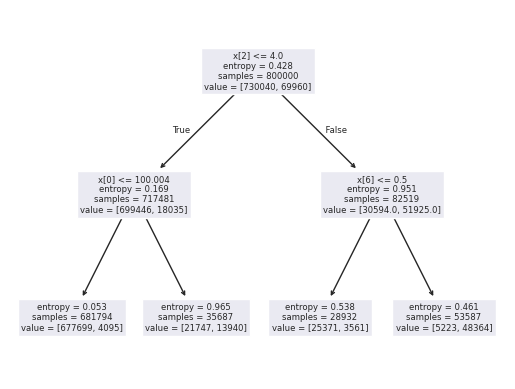

In [14]:
tree.plot_tree(dt)

In [ ]:
class_names = ['Fraud', 'Not Fraud']
label_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=300)

tree.plot_tree(dt, feature_names=label_names, class_names=class_names, filled=True)

In [18]:
print(accuracy_score(y_test, y_pred))

0.96699


## Random Forest

In [19]:
rf = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=7)

In [20]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [21]:
estimator = rf.estimators_

In [22]:
rf_y_pred = rf.predict(x_test)

In [23]:
print(accuracy_score(y_test, y_pred))

0.96699


In [24]:
class_names = ['Fraud', 'Not Fraud']
label_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

[Text(0.5, 0.8333333333333334, 'used_pin_number <= 0.5\ngini = 0.159\nsamples = 505526\nvalue = [730179, 69821]\nclass = Fraud'),
 Text(0.25, 0.5, 'ratio_to_median_purchase_price <= 4.0\ngini = 0.175\nsamples = 454644\nvalue = [649648, 69595]\nclass = Fraud'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.055\nsamples = 407961\nvalue = [627302, 18162]\nclass = Fraud'),
 Text(0.375, 0.16666666666666666, 'gini = 0.422\nsamples = 46683\nvalue = [22346, 51433]\nclass = Not Fraud'),
 Text(0.75, 0.5, 'ratio_to_median_purchase_price <= 4.004\ngini = 0.006\nsamples = 50882\nvalue = [80531, 226]\nclass = Fraud'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 45524\nvalue = [72194, 0]\nclass = Fraud'),
 Text(0.875, 0.16666666666666666, 'gini = 0.051\nsamples = 5358\nvalue = [8337, 226]\nclass = Fraud')]

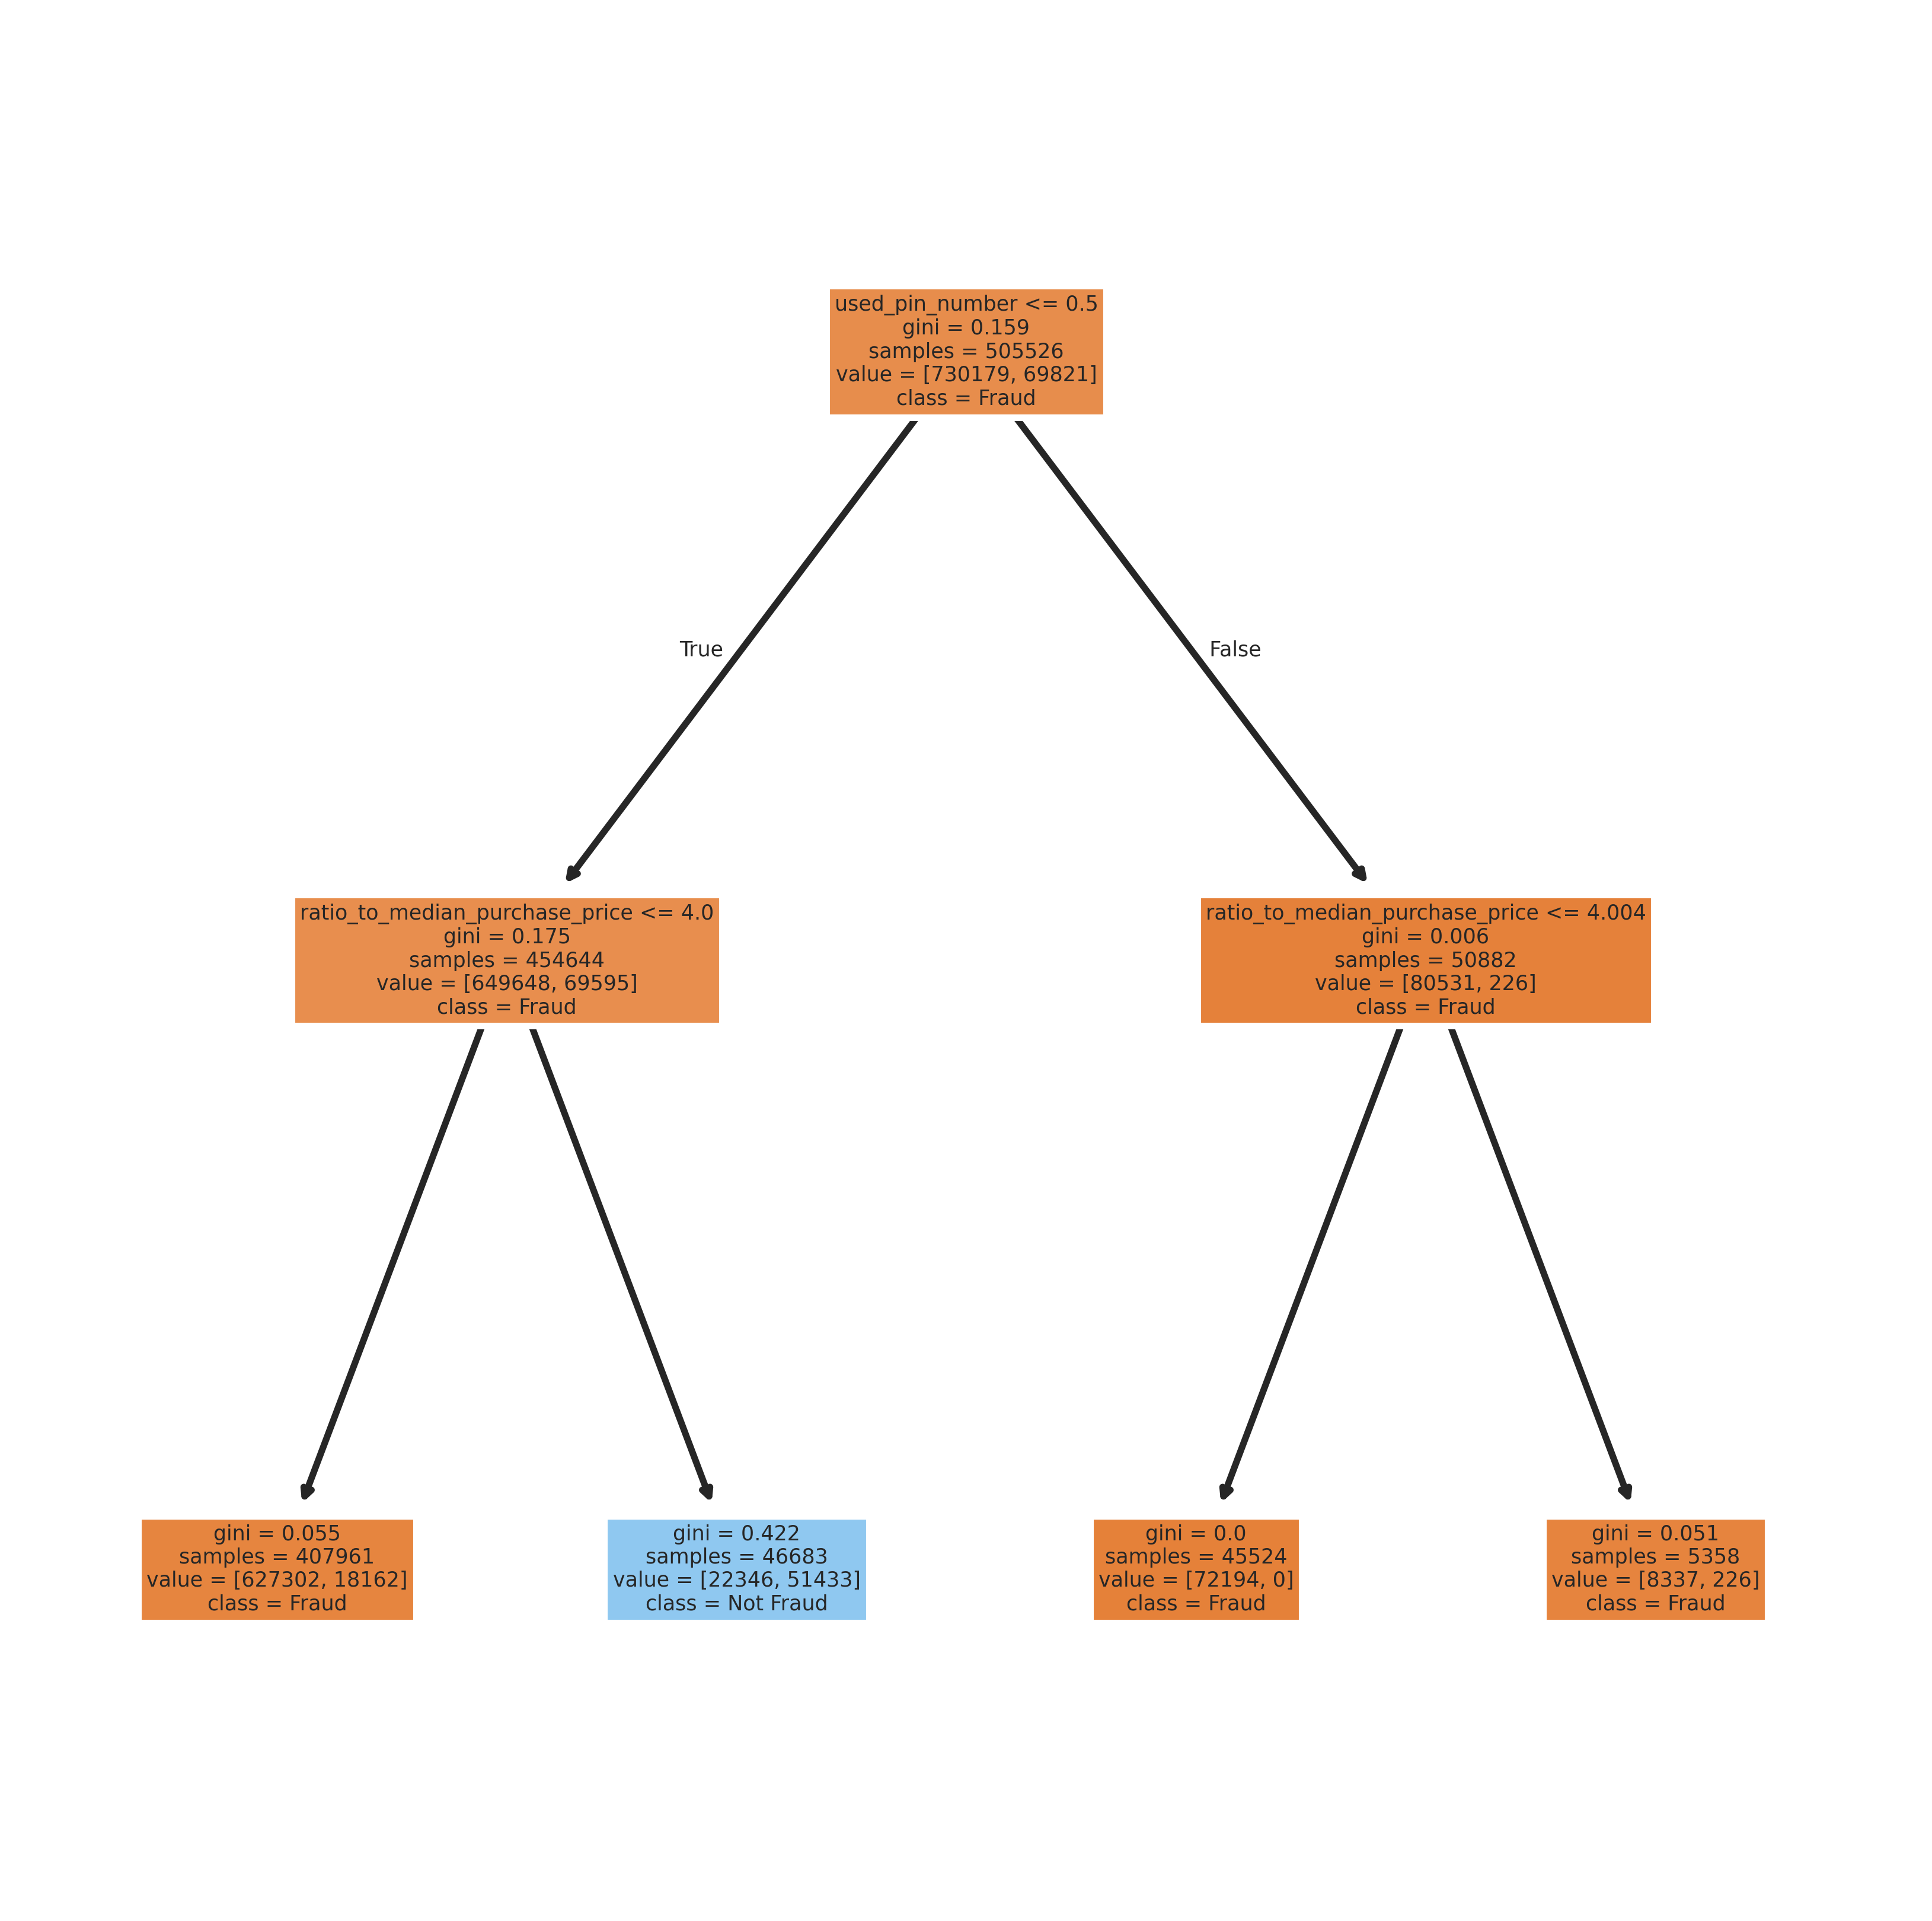

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=800)

tree.plot_tree(rf.estimators_[0], feature_names=label_names, class_names=class_names, filled=True) # plot the first tree

In [26]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.95313625
0.953715
